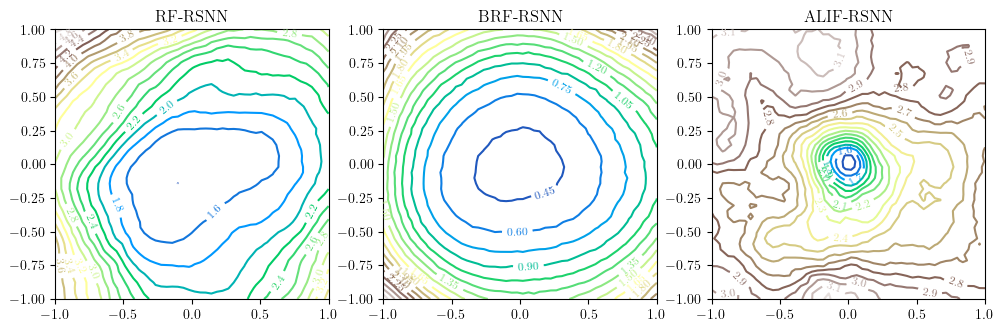

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": '\rmfamily'
# })
from matplotlib import cbook, cm
from scipy.interpolate import griddata

art = ['rf', 'brf', 'alif_tbptt']
titles = ['RF-RSNN', 'BRF-RSNN', 'ALIF-RSNN']

points = 50
bound = 1
test_batch_size = 10000

X = np.linspace(-bound,bound,num=points)
Y = np.linspace(-bound,bound,num=points)
X, Y = np.meshgrid(X, Y)

Z = [np.load('./stats/best_{}_model_{}_1_10000.npy'.format(art[i], points)) for i in range(len(art))]

global_max = np.max(Z)
c_map = cm.terrain

fig = plt.figure(figsize=(12,3.5))

for i in range(len(Z)):

    # Add a 2D subplot
    local_max = np.max(Z[i])

    ax2d = fig.add_subplot(1, len(Z), i+1)
    cs = ax2d.contour(X, Y, Z[i], 20, cmap=c_map) #, levels=levels) 
    ax2d.clabel(cs, inline=True, fontsize=8)
    ax2d.set_title(titles[i])
    
# plt.savefig("../../../ipe/post_thesis_contour_plot_different_scale.pdf", transparent=True, bbox_inches='tight')


0
1
2


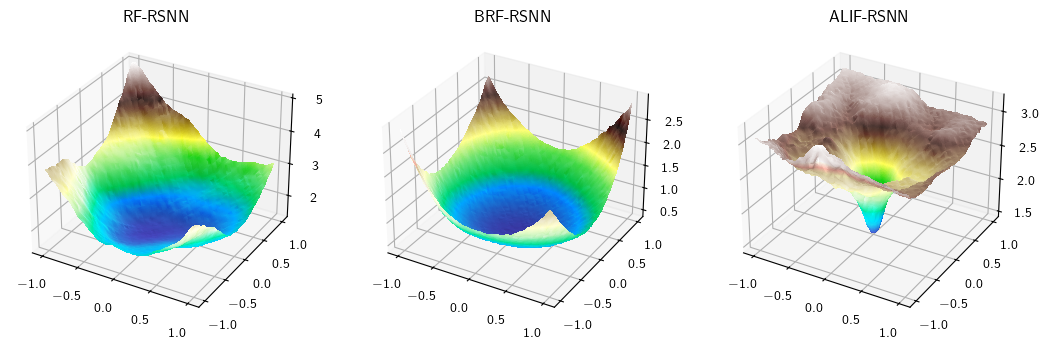

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": '\rmfamily'
# })
plt.rcParams['text.usetex'] = True 
plt.rcParams['text.latex.preamble'] = r'\usepackage[cm]{sfmath}'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'cm'
from matplotlib import cbook, cm
from matplotlib.colors import LightSource
from scipy.interpolate import griddata

art = ['rf', 'brf','alif_tbptt']
titles = ['RF-RSNN', 'BRF-RSNN',  'ALIF-RSNN']
points = 50
bound = 1
test_batch_size = 10000
X = np.linspace(-bound,bound,num=points)
Y = np.linspace(-bound,bound,num=points)
X, Y = np.meshgrid(X, Y)

# Interpolate to 200x200 grid
x_new = np.linspace(-bound,bound, 1000)
y_new = np.linspace(-bound,bound, 1000)
X_new, Y_new = np.meshgrid(x_new, y_new)

c_map = cm.terrain

Z = [np.load('./loss_landscape/best_{}_model_{}_1_10000.npy'.format(art[i], points)) for i in range(len(art))]

fig = plt.figure(figsize=(13,6))

for i in range(len(Z)):
    print(i)
    Z_new = griddata((X.flatten(), Y.flatten()), Z[i].flatten(), (X_new, Y_new), method='cubic')
        
    ax3d = fig.add_subplot(1, len(Z), i+1, projection='3d')

    local_min = np.min(Z[i])
    local_max = np.max(Z[i])
    
    norm = plt.Normalize(vmin=local_min, vmax=local_max)
    # colors = c_map(norm(Z_new))
    
    # Create light source object.
    ls = LightSource(azdeg=0, altdeg=125) # 0,125
    
    # Shade data, creating an rgb array.
    rgb = ls.shade(norm(Z_new), c_map)
    
    surf =ax3d.plot_surface(X_new, Y_new, Z_new, rstride=1, cstride=1, linewidth=0,
                           antialiased=False, facecolors=rgb, vmin=local_min, vmax=local_max, cmap=c_map)
    

    ax3d.set_zlim([local_min, local_max])
    ax3d.set_title(titles[i])
    
# plt.savefig("../../../ipe/post_thesis_surface_plot_different_scale_v2.png",dpi=600,transparent=True, bbox_inches='tight')